<a href="https://colab.research.google.com/github/jcmachicao/curso_ai_salud/blob/master/aisalud__mp_svm_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 00
# **Curso Modelamiento Predictivo para Salud**
---
* **Modelamiento Predictivo para Base de Datos de Tumores CA**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

# Preparación

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
ca = load_breast_cancer()

In [ ]:
ca.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
ca.data.shape, ca.target.shape

((569, 30), (569,))

In [ ]:
print(ca.DESCR)

In [ ]:
ca.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(ca.data)
X_mm = scaler.transform(ca.data)
X_mm.shape

(569, 30)

In [ ]:
y_or = ca.target
y_or.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_mm, y_or, test_size=0.4, random_state=42)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((341, 30), (228, 30), (341,), (228,))

# Exploración

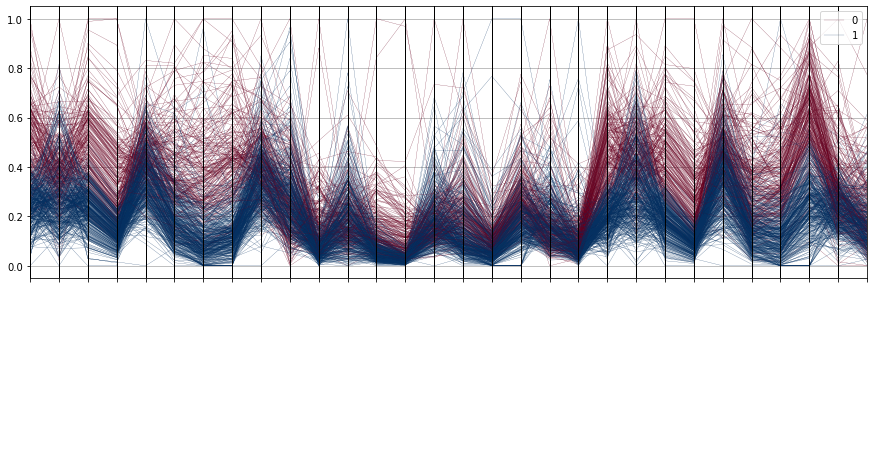

In [ ]:
plt.figure(figsize=(15,5))
data_df = pd.DataFrame(X_mm, columns=ca.feature_names)
data_df['target'] = y_or
pd.plotting.parallel_coordinates(data_df, 'target', colormap='RdBu', lw=0.2)
plt.xticks(rotation=90, color='white', fontsize=14)
plt.show()

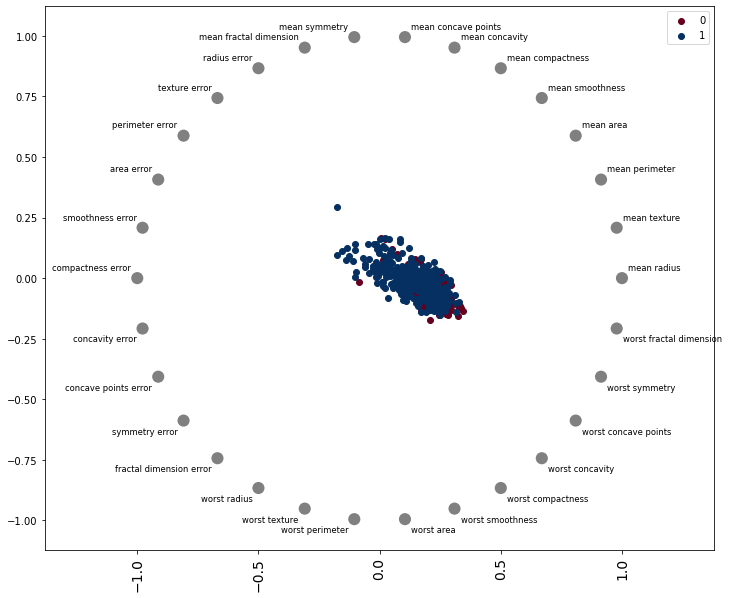

In [ ]:
plt.figure(figsize=(12,10))
data_df = pd.DataFrame(X_mm, columns=ca.feature_names)
data_df['target'] = y_or
pd.plotting.radviz(data_df, 'target', colormap='RdBu')
plt.xticks(rotation=90, fontsize=14)
plt.show()

# Ejecución

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
svm_model = SVC()
svm_model.fit(X_tr, y_tr)
y_pr = svm_model.predict(X_ts)
y_pr.shape

(228,)

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_tr, y_tr)
y_pr2 = logreg_model.predict(X_ts)
y_pr2.shape

(228,)

In [ ]:
randfor_model = RandomForestClassifier()
randfor_model.fit(X_tr, y_tr)
randfor_model.fit(X_tr, y_tr)
y_pr3 = randfor_model.predict(X_ts)
y_pr3.shape

(228,)

# Reporte

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

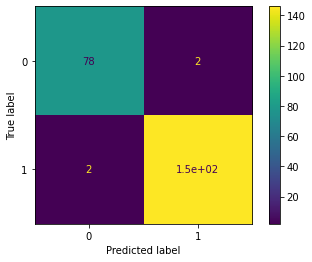

In [ ]:
plot_confusion_matrix(svm_model, X_ts, y_ts)

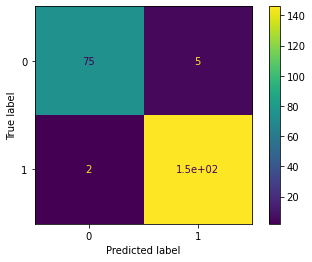

In [ ]:
plot_confusion_matrix(logreg_model, X_ts, y_ts)

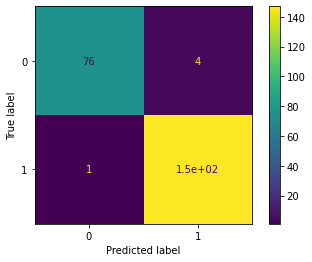

In [ ]:
plot_confusion_matrix(randfor_model, X_ts, y_ts)

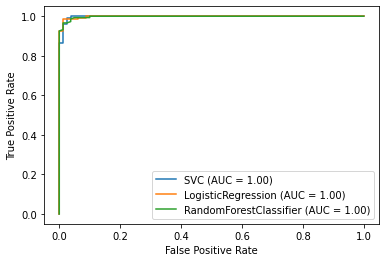

In [ ]:
svm_plot = plot_roc_curve(svm_model, X_ts, y_ts)
logreg_plot = plot_roc_curve(logreg_model, X_ts, y_ts, ax=svm_plot.ax_)
randfor_plot = plot_roc_curve(randfor_model, X_ts, y_ts, ax=svm_plot.ax_)
plt.show()

# Referencias

* https://github.com/ryanschaub/Breast-Cancer-Classification-using-Support-Vector-Machine-Models/blob/master/Homework%203.ipynb

* https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

* https://www.datosabiertos.gob.pe/dataset/casos-positivos-por-covid-19-ministerio-de-salud-minsa